# Prediction of "lead_general"

## 0 Dependencies

In [1]:
import pandas as pd

# String Encoding
from sklearn.preprocessing import LabelEncoder

# Creation of training and testing sets
from sklearn.model_selection import train_test_split

# Creation of balanced data sets
from imblearn.under_sampling import  RandomUnderSampler
#from collections import Counter
#from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import RandomOverSampler

# PyCaret
from pycaret.classification import *

# ML algoriths
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Analysis of ML models
from sklearn.metrics import confusion_matrix

import json


import numpy

# https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html
from imblearn.under_sampling import NearMiss

from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

## 1 Data import

In [2]:
cookie_data = pd.read_csv('./TU/Cookie_prepared.csv', sep=';', dtype='string')
cookie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252177 entries, 0 to 252176
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   userid_1             252177 non-null  string
 1   visitsmonth1         252177 non-null  string
 2   visitsmonth3         252177 non-null  string
 3   zipcode              252177 non-null  string
 4   carsearch            252177 non-null  string
 5   conf_start_iv4       252177 non-null  string
 6   conf_start_gulfvar   252177 non-null  string
 7   conf_start_upper     252177 non-null  string
 8   conf_start_polnew    252177 non-null  string
 9   conf_start_pol       252177 non-null  string
 10  conf_start_crossing  252177 non-null  string
 11  conf_start_golf      252177 non-null  string
 12  conf_start_croc      252177 non-null  string
 13  conf_start_tour      252177 non-null  string
 14  conf_start_tiga      252177 non-null  string
 15  conf_start_pass      252177 non-nu

## 2 Preliminary Checks

As we imported the prepared data, there should be no NA values present anymore

In [3]:
NA_overview = cookie_data.isna().sum()
cookie_columns = cookie_data.columns

# Filter those entries with an aggregates sum of at least 1
list_of_NA_columns = []
for i in range(len(cookie_data.columns)):
    # Only include columns with at least 1 NA value
    if NA_overview[i] > 0:
        list_of_NA_columns.append([cookie_columns[i], NA_overview[i]])

list_of_NA_columns

[]

## 3 Encode Non-numerical Values

The prepared data was not encoded, because we would then loose the dictionaries that were used to turn strings into integers. We need to do it now and save the used dictionaries for later use.

In [4]:
cookie_data_backup = cookie_data.copy()
dictionaries = {}
le = LabelEncoder()

for col in cookie_data_backup:
    # col referes to the column names   
    try:
        cookie_data[col] = pd.to_numeric(cookie_data_backup[col])
    except:
        # We have string entries we cant turn into numericals automatically -> encode!
        cookie_data[col] = le.fit_transform(cookie_data_backup[col])
        dictionaries.update({col: dict(zip(le.classes_, le.transform(le.classes_)))})

cookie_data

,userid_1,visitsmonth1,visitsmonth3,zipcode,carsearch,conf_start_iv4,conf_start_gulfvar,conf_start_upper,conf_start_polnew,conf_start_pol,conf_start_crossing,conf_start_golf,conf_start_croc,conf_start_tour,conf_start_tiga,conf_start_pass,conf_start_art,conf_start_shar,conf_start_touar,conf_start_tig,conf_end_gulfvar,conf_end_upper,conf_end_polnew,conf_end_pol,conf_end_crossing,conf_end_iv3,conf_end_golf,conf_end_croc,conf_end_tour,conf_end_tiga,conf_end_pass,conf_end_art,conf_end_shar,conf_end_touar,conf_end_tig,days_since_visit,sessionsnbr,lead_general,lead_model1,lead_model2
0,1,0,0,4000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,139,1,0,0,0
1,2,0,0,7673,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,203,1,0,0,0
2,3,0,0,5270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,1,0,0,0
3,4,0,1,5452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,1,0,0,0
4,5,0,0,6949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,124,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252172,252250,0,0,5998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,223,2,1,9,0
252173,252251,2,2,1844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,2,1,13,0
252174,252252,0,0,1767,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,4,1,0,0
252175,252253,0,0,2738,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,4,1,26,0


## ML Algorithm Candidates From PyCaret

We now have a candidate for all three target variables and urge to confirme these by running PyCaret for every target variable individually.

### "lead_model1"

In [5]:
pycaret_data_lead_model1 = cookie_data.drop(columns=['lead_general', 'lead_model2'])
exp_name_lead_model1 = setup(data=pycaret_data_lead_model1, target='lead_model1', session_id=5041, use_gpu=True, silent=True)

,Description,Value
0,session_id,5041
1,Target,lead_model1
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(252177, 38)"
5,Missing Values,False
6,Numeric Features,31
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best_model_lead_model1 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9918,0.0000,0.0979,0.9874,0.9892,0.2599,0.3157,18.1700
et,Extra Trees Classifier,0.9914,0.0000,0.0563,0.9854,0.9877,0.0907,0.1563,21.1440
lr,Logistic Regression,0.9913,0.0000,0.0445,0.9828,0.9870,0.0000,0.0000,313.2560
ridge,Ridge Classifier,0.9913,0.0000,0.0449,0.9830,0.9870,0.0038,0.0191,0.6670
dummy,Dummy Classifier,0.9913,0.0000,0.0445,0.9828,0.9870,0.0000,0.0000,0.1050
knn,K Neighbors Classifier,0.9907,0.0000,0.0539,0.9845,0.9875,0.1358,0.1719,12.4520
dt,Decision Tree Classifier,0.9870,0.0000,0.1092,0.9878,0.9874,0.2816,0.2820,3.4010
ada,Ada Boost Classifier,0.9861,0.0000,0.0534,0.9830,0.9845,0.0102,0.0138,22.0710
gbc,Gradient Boosting Classifier,0.9857,0.0000,0.0666,0.9889,0.9870,0.2898,0.2934,1430.7510
nb,Naive Bayes,0.9799,0.0000,0.0765,0.9846,0.9822,0.0861,0.0882,1.5060


In [6]:
model_lead_model1 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9920,0.0000,0.0932,0.9878,0.9895,0.2848,0.3381
1,0.9918,0.0000,0.1311,0.9878,0.9895,0.3077,0.3462
2,0.9920,0.0000,0.1064,0.9875,0.9894,0.2754,0.3353
3,0.9921,0.0000,0.1185,0.9885,0.9897,0.2928,0.3491
4,0.9921,0.0000,0.0837,0.9872,0.9891,0.2378,0.3141
5,0.9916,0.0000,0.0885,0.9868,0.9888,0.2264,0.2770
6,0.9920,0.0000,0.1144,0.9877,0.9892,0.2551,0.3198
7,0.9921,0.0000,0.1002,0.9874,0.9896,0.3202,0.3683
8,0.9915,0.0000,0.0738,0.9872,0.9886,0.1964,0.2549
9,0.9914,0.0000,0.0689,0.9861,0.9885,0.2026,0.2540


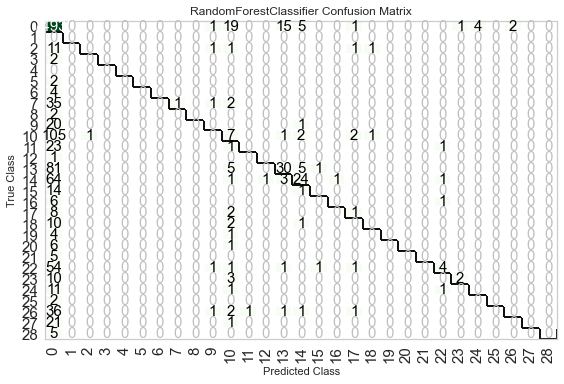

In [8]:
plot_model(model_lead_model1, plot = 'confusion_matrix')

In [7]:
F1_tuned_model_lead_model1, tuner = tune_model(model_lead_model1, optimize='F1', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9913,0.0000,0.0435,0.9827,0.9870,0.0000,0.0000
1,0.9913,0.0000,0.0435,0.9827,0.9870,0.0000,0.0000
2,0.9913,0.0000,0.0435,0.9827,0.9870,0.0000,0.0000
3,0.9914,0.0000,0.0455,0.9829,0.9871,0.0000,0.0000
4,0.9914,0.0000,0.0476,0.9829,0.9871,0.0000,0.0000
5,0.9914,0.0000,0.0476,0.9829,0.9871,0.0000,0.0000
6,0.9913,0.0000,0.0455,0.9827,0.9870,0.0000,0.0000
7,0.9913,0.0000,0.0435,0.9827,0.9870,0.0000,0.0000
8,0.9913,0.0000,0.0435,0.9827,0.9870,0.0000,0.0000
9,0.9913,0.0000,0.0417,0.9827,0.9870,0.0000,0.0000


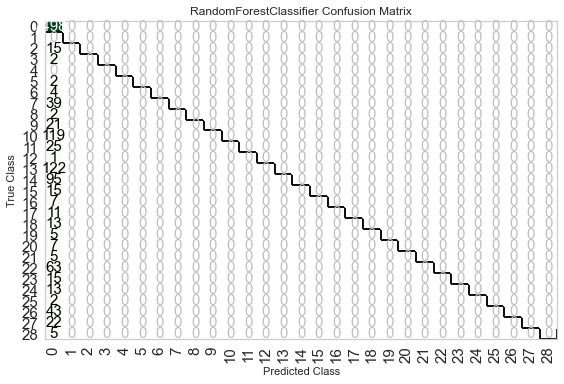

In [8]:
plot_model(F1_tuned_model_lead_model1, plot = 'confusion_matrix')

In [ ]:
F1_tuned_model_lead_model1, tuner = tune_model(model_lead_model1, optimize='F1', return_tuner=True)

In [ ]:
plot_model(F1_tuned_model_lead_model1, plot = 'confusion_matrix')

In [ ]:
recall_tuned_model_lead_model1, tuner = tune_model(model_lead_model1, optimize='F1', return_tuner=True)

In [ ]:
plot_model(F1_tuned_model_lead_model1, plot = 'confusion_matrix')

In [ ]:
print(tuner)
print(tuned_model_lead_model1)

### 5.2 "lead_model2"

In [10]:
pycaret_data_lead_model2 = cookie_data.drop(columns=['lead_general', 'lead_model1'])
exp_name_lead_model2 = setup(data=pycaret_data_lead_model2, target='lead_model2', session_id=5042, use_gpu=True, silent=True)

,Description,Value
0,session_id,5042
1,Target,lead_model2
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(252177, 38)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model_lead_model2 = compare_models()

In [11]:
model_lead_model2 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.0000,0.0833,0.9986,0.9990,0.0000,0.0000
1,0.9993,0.0000,0.0909,0.9986,0.9990,0.0000,0.0000
2,0.9993,0.0000,0.0909,0.9986,0.9990,0.0000,0.0000
3,0.9994,0.0000,0.1000,0.9988,0.9991,0.0000,0.0000
4,0.9994,0.0000,0.1000,0.9988,0.9991,0.0000,0.0000
5,0.9994,0.0000,0.0909,0.9988,0.9991,0.0000,0.0000
6,0.9994,0.0000,0.1000,0.9988,0.9991,0.0000,0.0000
7,0.9993,0.0000,0.0909,0.9986,0.9990,0.0000,0.0000
8,0.9993,0.0000,0.0909,0.9986,0.9990,0.0000,0.0000
9,0.9993,0.0000,0.0833,0.9986,0.9990,0.0000,0.0000


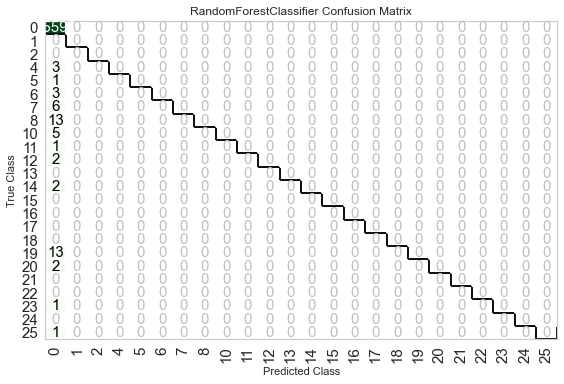

In [8]:
plot_model(model_lead_model2, plot = 'confusion_matrix')

In [14]:
F1_tuned_model_lead_model2, tuner2 = tune_model(model_lead_model2, optimize='F1', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.0000,0.0833,0.9986,0.9990,0.0000,0.0000
1,0.9993,0.0000,0.0909,0.9986,0.9990,0.0000,0.0000
2,0.9993,0.0000,0.0909,0.9986,0.9990,0.0000,0.0000
3,0.9994,0.0000,0.1000,0.9988,0.9991,0.0000,0.0000
4,0.9994,0.0000,0.1000,0.9988,0.9991,0.0000,0.0000
5,0.9994,0.0000,0.0909,0.9988,0.9991,0.0000,0.0000
6,0.9994,0.0000,0.1000,0.9988,0.9991,0.0000,0.0000
7,0.9993,0.0000,0.0909,0.9986,0.9990,0.0000,0.0000
8,0.9993,0.0000,0.0909,0.9986,0.9990,0.0000,0.0000
9,0.9993,0.0000,0.0833,0.9986,0.9990,0.0000,0.0000


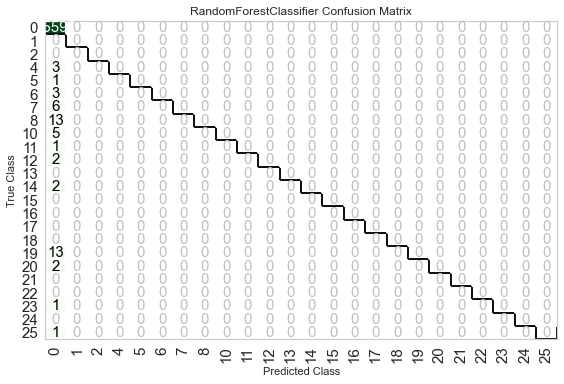

In [15]:
plot_model(F1_tuned_model_lead_model2, plot = 'confusion_matrix')

In [16]:
recall_tuned_model_lead_model2, tuner2 = tune_model(model_lead_model2, optimize='Recall', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9926,0.0000,0.0552,0.9993,0.9960,0.0839,0.1511
1,0.9928,0.0000,0.0747,0.9992,0.9959,0.0724,0.1282
2,0.9938,0.0000,0.0553,0.9993,0.9965,0.0911,0.1520
3,0.9921,0.0000,0.1049,0.9994,0.9957,0.0784,0.1515
4,0.9914,0.0000,0.1466,0.9994,0.9953,0.0782,0.1571
5,0.9943,0.0000,0.1559,0.9991,0.9967,0.0728,0.1211
6,0.9946,0.0000,0.1108,0.9992,0.9969,0.0860,0.1400
7,0.9950,0.0000,0.0524,0.9991,0.9971,0.0922,0.1401
8,0.9917,0.0000,0.1245,0.9993,0.9954,0.0748,0.1420
9,0.9924,0.0000,0.1049,0.9993,0.9958,0.0872,0.1602


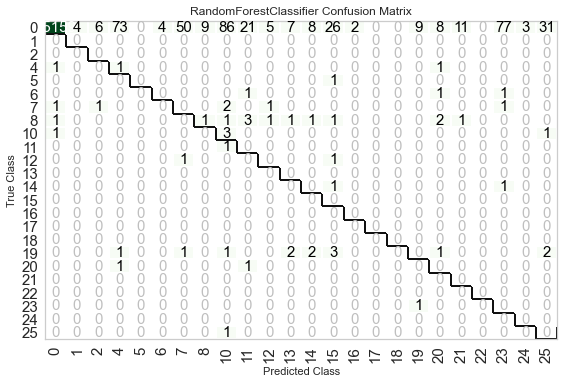

In [17]:
plot_model(recall_tuned_model_lead_model2, plot = 'confusion_matrix')

In [ ]:
print(tuner2)
print(tuned_model_lead_model2)